# Erster Teil

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data1=np.loadtxt("data_exp.txt",delimiter=',')
t=data1[:,0]
y=data1[:,1]

$$y=Ae^{\lambda t}$$
$$\log(y)=log(A)+\lambda t$$
$$ U = C + \lambda t $$
After fitting the last equation we have $A=e^C$

A= 3.22 lambda= 1.2


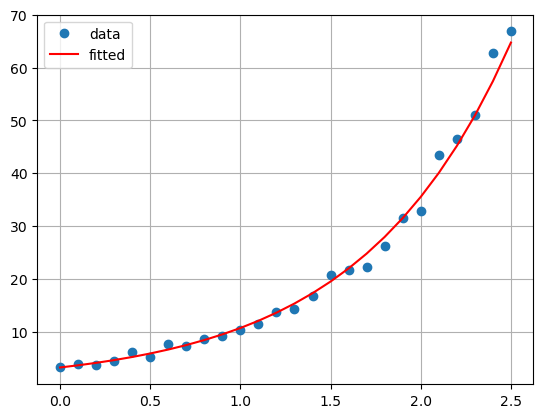

In [3]:
U=np.log(y)
X=np.vstack([np.ones(len(t)),t]).T
C,lam = np.linalg.lstsq(X,U, rcond=None)[0]
A=np.exp(C)

plt.plot(t,y,'o', label="data")
plt.plot(t,A*np.exp(lam*t), '-r', label='fitted')
plt.legend()
plt.grid()
print("A=",np.round(A,3),"lambda=",np.round(lam,3))

# Zweiter Teil

0.0834117972971881 -17.28812054861531 890.8820629192527
['0.000007277422196726095', '0.07277631475371465', '5.89661435107178']
7.277422196726095e-06 0.07277631475371465 5.89661435107178


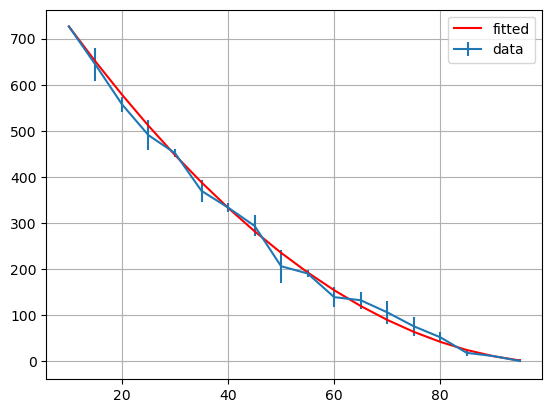

In [28]:
data2=np.loadtxt("data_res.txt", delimiter=',')
T,R,DeltaR=[data2[:,i] for i in range(3)]


def polyfit(x,y, sigma, order):
    # make y a column vector
    y=np.reshape(y,(-1,1))
    #define X und W    
    W=np.diag(1/sigma**2)
    Xt = np.vstack([x**i for i in range(order+1)])
    X=np.transpose(Xt)

    N=Xt@W@X
    Ninv=np.linalg.inv(N)
    a=Ninv@Xt@W@y
    return a.ravel(), Ninv

(c,b,a),cov=polyfit(T,R,DeltaR,2)
print(a,b,c)
print([np.format_float_positional(cov[i,i], unique=True, fractional=False, trim='k') for i in range(2,-1,-1) ])
print(cov[2,2],cov[1,1],cov[0,0])

plt.errorbar(T,R,yerr=DeltaR, label="data")
plt.plot(T,a*T**2+b*T+c, '-r', label='fitted')
plt.legend()
plt.grid()


0.08341179730440018 -17.288120549509472 890.8820629293277
[1.29608124e+04 5.66098093e+02 4.09293500e-01]
[5.95299542e-09 3.12044560e-06 5.96939482e+00]


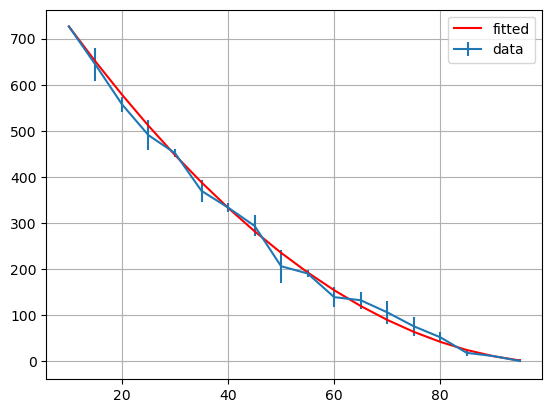

In [15]:
def np_polyfit(x,y,sigma,order):
    X=np.vstack([x**i for i in range(order+1)]).T
    w=1/sigma
    return np.linalg.lstsq(np.diag(w)@X, w*y, rcond=None)

(c,b,a),_,_,s=np_polyfit(T,R,DeltaR,2)
print(a,b,c)
print(s)
print (1/s**2)
plt.errorbar(T,R,yerr=DeltaR, label="data")
plt.plot(T,a*T**2+b*T+c, '-r', label='fitted')
plt.legend()
plt.grid()